# 가위바위보분류기 제작
***
## 모듈임포팅
***

In [2]:
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 데이터 전처리
***
### 리사이징 및 라벨링
* 사이즈 28 , 가위 [0], 바위 [1], 보[2]

In [54]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train28/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

110  images to be resized.
110  images resized.
가위 이미지 resize 완료!


In [55]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train28/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 resize done")

156  images to be resized.
156  images resized.
보 resize done


In [56]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train28/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 resize done")

145  images to be resized.
145  images resized.
바위 resize done


## 데이터 로드
***
### x_train, y_train 데이터셋 저장

In [59]:
import numpy as np

def load_data(img_path, number_of_data=411):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train28"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 411 입니다.
x_train shape: (411, 28, 28, 3)
y_train shape: (411,)


### 데이터가 정상적으로 로드되었는지 검증
* 데이터 불러오기

라벨:  0


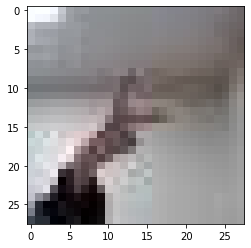

In [60]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 모델 정의
***
### keras.sequential 모델 사용

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

## 학습 수행 및 테스트
***

In [62]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 9ms/step - loss: 14.3073 - accuracy: 0.4331
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 2.5261 - accuracy: 0.6618
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.8394
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.8978
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9440
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9684
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9757
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9903
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9951
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9976


In [65]:
"""
절차 생략

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 resize done")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 resize done") """

import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/test28"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [66]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
5
print("test_loss: {} ".format(test_loss))
6
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 2.8086 - accuracy: 0.4117
test_loss: 2.808631181716919 
test_accuracy: 0.4116666615009308


> 학습 및 테스트 수행 후
   >* 기존 학습 데이터의 수(411개)가 너무 적다고 느낌
        * 학습 데이터 수를 늘림(1733개)
   > * 28x28 픽셀 사이즈로 크기를 줄이는 이유를 모르겠음
        * 코드 실험결과 224x224 크기의 이미지도 전처리나 학습에 지장이 없는 것으로 보여지며, 굳이 번거로운 과정을 거쳐야 하나 의문이 들었음
        * 또한 크기를 작게 변형할 경우 형체가 매우 불명확하므로, 픽셀 값을 토대로 이미지를 인식하는 방식임을 감안할 때 높은 픽셀 값이 학습에 유리할 것이라고 판단함
        * 데이터 전처리 과정이 더욱 단순해져서 편하기도 함

***
## 224x224 크기의 이미지로 학습을 재시도함
***
### 데이터 전처리 및 로드
* resizing 구간 코드 삭제
* number_of_data 업데이트, img_size 업데이트
* 기타 디렉터리 연결 확립

In [5]:
def load_data(img_path, number_of_data=1733):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train224"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1733 입니다.
x_train shape: (1733, 224, 224, 3)
y_train shape: (1733,)


### 모델 정의
* 우선 input_shape만 업데이트하여 데이터 형태만 맞춰준 뒤 추이를 보고 모델을 추가적으로 수정하기로 함

In [69]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2986016   
_________________________________________________________________
dense_7 (Dense)              (

### 학습 수행

In [70]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
55/55 [==============================] - 2s 23ms/step - loss: 144.1239 - accuracy: 0.7357
Epoch 2/10
55/55 [==============================] - 1s 20ms/step - loss: 0.0359 - accuracy: 0.9856
Epoch 3/10
55/55 [==============================] - 1s 20ms/step - loss: 0.0131 - accuracy: 0.9983
Epoch 4/10
55/55 [==============================] - 1s 19ms/step - loss: 6.7486e-04 - accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - 1s 20ms/step - loss: 0.0142 - accuracy: 0.9960
Epoch 6/10
55/55 [==============================] - 1s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/10
55/55 [==============================] - 1s 20ms/step - loss: 1.5348e-04 - accuracy: 1.0000
Epoch 8/10
55/55 [==============================] - 1s 19ms/step - loss: 1.1307e-04 - accuracy: 1.0000
Epoch 9/10
55/55 [==============================] - 1s 20ms/step - loss: 8.4661e-05 - accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - 1s 19ms/step - loss: 6.6709e-05 - accu

### 학습된 모델의 테스트 수행
* 마찬가지로 resizing 절차가 불필요하여 주석 처리 및 변수, 디렉터리 등 업데이트
* test_dataset은 600개로 구성됨

In [71]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/test224"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 224, 224, 3)
y_test shape: (600,)


### test 수행

In [72]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
5
print("test_loss: {} ".format(test_loss))
6
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 3.6987 - accuracy: 0.2583
test_loss: 3.698709726333618 
test_accuracy: 0.25833332538604736


### 테스트 결과
***
* accuracy가 0.25 ~ 0.40 사이 밖에 나오지 않음.
* 하이퍼파라미터를 임의로 조정해도 원하는 결과가 나오지 않고 있음.
    * 파라미터의 인자값, 조정할 경우 생기는 변화 등 정확한 이론과 지표를 알 수 없기 때문에 무작정 조정하는 것은 무의미하다고 느낌
* keras.models.Sequential()의 정확한 구조와 언더피팅/오버피팅의 개념을 조사하고 다시 진행하기로 함.
* 아이펠 교육수강 중 데이터 선별이 중요하다는 정보를 추가로 입수하여 중복데이터 및 판별이 어려울 것 같은(흔들림, 식별하기 힘들 것으로 사료되는 자세나 모양 등) 데이터를 모두 삭제하는 과정도 추가하기로 함.
***

## 데이터 선별
***
### 자세, 모양이 비슷한 중복 데이터를 삭제<br>흔들림, 초점 불분명, 판별하기 어려울 것으로 사료되는 모양, 자세 등 삭제

![](imgs/data_del1.png)

![](imgs/data_del2.png)

#### 데이터 재업로드 및 디렉터리 정리

![](imgs/upload.png)

### 재선별한 데이터로 학습 및 테스트 재수행
#### 데이터 재가공 외에 다른 변경사항은 없이 우선 진행해보기로 함.

In [10]:
def load_data(img_path, number_of_data=626):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train224"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 626 입니다.
x_train shape: (626, 224, 224, 3)
y_train shape: (626,)


##### 별것 아닌 것 같지만 리사이징 부분 코드를 완전히 삭제하니 정말 편하긴 하다.

라벨 :  0


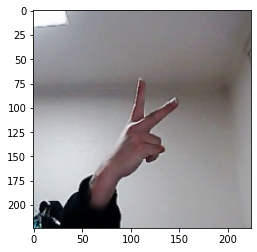

In [75]:
plt.imshow(x_train[0])
print('라벨 : ', y_train[0])

##### 본 사이즈 그대로 로드된 데이터

In [77]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2986016   
_________________________________________________________________
dense_9 (Dense)              (

In [78]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 32ms/step - loss: 449.4370 - accuracy: 0.3562
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 2.2776 - accuracy: 0.4073
Epoch 3/10
20/20 [==============================] - 0s 19ms/step - loss: 1.0200 - accuracy: 0.4665
Epoch 4/10
20/20 [==============================] - 0s 20ms/step - loss: 0.9928 - accuracy: 0.4760
Epoch 5/10
20/20 [==============================] - 0s 19ms/step - loss: 0.9606 - accuracy: 0.5112
Epoch 6/10
20/20 [==============================] - 0s 20ms/step - loss: 0.9217 - accuracy: 0.5495
Epoch 7/10
20/20 [==============================] - 0s 19ms/step - loss: 0.8064 - accuracy: 0.6502
Epoch 8/10
20/20 [==============================] - 0s 20ms/step - loss: 0.7315 - accuracy: 0.6997
Epoch 9/10
20/20 [==============================] - 0s 20ms/step - loss: 0.7098 - accuracy: 0.7061
Epoch 10/10
20/20 [==============================] - 0s 20ms/step - loss: 0.7348 - accuracy: 0.7188


##### 테스트

In [79]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test224"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 224, 224, 3)
y_test shape: (600,)


In [80]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
5
print("test_loss: {} ".format(test_loss))
6
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 1.6089 - accuracy: 0.1983
test_loss: 1.6089372634887695 
test_accuracy: 0.19833333790302277


##### 모델 학습 성능부터 심각하게 낮게 떠서 매우 걱정했는데...<br>혹시나가 역시나 최악의 결과를 도출함
***


## 최후의 수단. 모델 하이퍼 파라미터를 변경해보자
***
* keras.models.Sequential()의 함수에 따른 전달 인자나 작동구조 등을 조사해보고<br>성능을 높일 수 있는 방향으로 파라미터를 조정해보기로 함
### 모델 정의 코드

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

### CNN
**이 친구의 정확한 이름은 Convolution Neural Network, 합성곱 신경망이다.<br>합성곱이 무엇인지 우선 알아보자.**

![](imgs/convolution_def.png)

![](imgs/convolution_def2.png)

**??? 합성곱은 그만 알아보자**<br><br>**농담이고 이런 수학적 이론은 잘 모르겠지만 cnn의 동작구조를 보면 맥락은 알 것 같다.**

#### CNN의 동작구조
**기본적으로 신경망 모델은 1차원 데이터밖에 소화할 수 없다고 한다. 하지만 이미지는 다차원 데이터이다. 훌륭하신 분들은 이 문제를 해결하기 위해 CNN을 개발하였다.**
<br>
**상기 기재된 코드를 기준으로 CNN의 특징을 나열해보자**
* **다차원 데이터를 입력할 수 있다.(= convolution)**
    * 입력 과정에서 일정 크기의 필터로 다차원 데이터의 일정 영역을 합성곱 계산하여 feature로써 새로운 배열에 저장<br>이 행위가 반복되어 2차원 행렬 feature map을 생성한다.
* **빠르고 효율적인 압축.(= pooling)**
    * convolution 과정에서 데이터의 크기는 어느정도 줄어들지만 충분하지 않고 오랜 시간과 자원을 소모한다. 이 과정을 생략하기 위해 최대, 평균, 최소값 등 기준을 정해 원하는 크기로 feature map을 압축한다.
* **신경망은 편식쟁이.(= flatten)**
    * 상기에 언급했듯이 신경망은 1차원 데이터밖에 읽어드릴 수 없다. 충분히 압축된 데이터는 flatten 과정을 통해 1차원 데이터의 형태로 변형하여 학습이 가능하도록 한다.
* **분류 시작.(= dense)**
    * extracted feature에 대한 학습과 분류를 실행하는 layer이다.

![](imgs/cnn_structure.png)
##### 설명을 도식화하면 이런 느낌

#### 코드 분석
**구조와 개념을 알고 나니 인수값에 대한 이해가 조금은 생긴 것 같다.**

>**model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))<br>
model.add(keras.layers.MaxPool2D(2,2))**

* pooling layer는 선택사항이지만 일반적으로 convolution과 pooling을 한 세트로 사용한다고 한다.
* 위에 선언된 keras.layers.Conv2D 코드의 인자는 순서대로
    * filter의 수
    * filter의 사이즈
    * 활성함수 여부
    * 입력 데이터의 크기와 채널
    을 의미한다.
* 다음으로 keras.layers.MaxPool2D는 어느 정도 압축할 것인지에 대한 인자이다.
    * 이부분은 사실 명확하지 않은데 (2,2)행렬로 압축하겠다는 소리가 아니라 각 행과 렬을 2로 나눈 결과로 압축한다는 의미 같다.

>**model.add(keras.layers.Flatten())<br>
model.add(keras.layers.Dense(32, activation='relu'))<br>
model.add(keras.layers.Dense(3, activation='softmax'))**<br>
* flatten() 평면화, 즉 모델이 학습할 수 있도록 1차원데이터로 변형한다.
* keras.layers.Dense 실제로 학습하고, 분류하는 진정한 뉴런이다.
    * 이 또한 명확하지 않지만, 여러 레퍼런스를 본 결과 CNN은 구조 상 Data extraction과 Classification영역을 나누어져 있다는 것을 알 수 있었다. 학습할 데이터를 선별하고 해석 가능한 상태로 변형하는 과정 역시 학습이지만, 정말 의미 그대로의 "학습"을 진행하는 레이어는 여기가 아닐까 생각한다. 마치 영어를 공부할 때 모르는 단어를 먼저 찾고 독해 공부를 하는 것 처럼.
    * 각설하고 각 인자는
        * 학습할 feature의 갯수(뉴런?)
        * 활성함수 (=ReLU)
            * ReLU는 0 이하의 값을 모두 0으로 처리(버린다.). 양수만 x 그대로 반환한다.
        * class의 갯수
            * 삼진 분류 모델임을 알 수 있다. (가위 바위 보)
        * 활성함수 (=softmax)
            * softmax는 출력된 결과값을 확률값(%), 즉 0~1 사이의 값으로 조정할 때 사용된다.<br>원조는 sigmoid인데, output이 3개 이상일 경우 여러 개의 sigmoid 함수로 구성된 softmax를 활용 할 수 있다.

>ref.
>* keras.sequential conv2d parameter : <br>
    https://keras.io/ko/layers/convolutional/<br>
https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/
>* about ReLU<br>
    https://keras.io/api/layers/activations/<br>
https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
>* keras.layer.dense<br>
https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/
>*cnn구조에 대한 설명<br>
https://codetorial.net/tensorflow/convolutional_neural_network.html<Br>
http://taewan.kim/post/cnn/<br>
https://youngq.tistory.com/40
>* 합성곱<br>
https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1

### 공부 끝. 파라미터를 변경해보자
**해보고 싶은 것도 많고 의문점도 많이 남았지만, 시간이 부족한 관계로 최대한 모험이 되지 않는 선에서 진행했다.<br>모든 의문은 회고에 남겨보자**

#### 데이터 재업로드(선별건)

In [ ]:
def load_data(img_path, number_of_data=626):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train224"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

#### 파라미터 변경

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (10,10), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  11
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

In [10]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test224"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 224, 224, 3)
y_test shape: (600,)


In [25]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
5
print("test_loss: {} ".format(test_loss))
6
print("test_accuracy: {}".format(test_accuracy))

19/19 - 1s - loss: 7.0196 - accuracy: 0.3900
test_loss: 7.0196404457092285 
test_accuracy: 0.38999998569488525


##### 결과는 크게 달라지지 않고, 최고 성능이 고작 0.40을 조금 넘는 수준이다. 1/3확률을 고려할 때 학습이 거의 안되는 것이나 마찬가지다.<br>마지막으로 원래의 가이드라인대로 28크기의 이미지로 변형하여 진행해보기로 했다.

#### 데이터 재업로드

In [46]:
import numpy as np

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train224/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train224/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 resize done")

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train224/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 resize done")

def load_data(img_path, number_of_data=1733):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_git/rock_scissor_paper/train224"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

522  images to be resized.
522  images resized.
가위 이미지 resize 완료!
619  images to be resized.
619  images resized.
보 resize done
592  images to be resized.
592  images resized.
바위 resize done
학습데이터(x_train)의 이미지 개수는 1733 입니다.
x_train shape: (1733, 28, 28, 3)
y_train shape: (1733,)


#### 모델 재정의

In [80]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                102432    
_________________________________________________________________
dense_43 (Dense)             

#### 학습

In [81]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 4ms/step - loss: 5.2604 - accuracy: 0.5551
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8309
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9192
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9671
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9827
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9885
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9977
Epoch 8/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9988
Epoch 9/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9994
Epoch 10/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 1.0000


#### 테스트데이터 업로드 및 테스트 수행

In [65]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test28"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [84]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
5
print("test_loss: {} ".format(test_loss))
6
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 4.0704 - accuracy: 0.2967
test_loss: 4.070441722869873 
test_accuracy: 0.2966666519641876


#### 결과
**이미지 사이즈를 늘리던 줄이던 큰 차이를 보이진 않는다. 224x224 기준 0.40, 28x28 기준 0.45로 아무튼 전혀 실효성이 없는 모델이라고 봐도 될 것 같다. 이해 자체가 너무 얕았고, 그 이해를 실제에 적용하는 것은 더더욱 먼 문제였기 때문에 별 소득이 없었던 것 같다.**
***

# 회고
***
## E01
### AIFFEL 첫 실습을 마치며.
***
**어느정도 예상했다고 생각했지만 훨씬 어렵다. 애초에 코딩에 대한 선지식이 없기도 하지만, 어쨋든 1년을 공부한 정보보안과 접점이 거의 없다는 점이 참 개인적으로 아쉽고 허탈하기도 하다. '언젠가는 깨우치는 날이 오겠지...' 하고 참을성을 가져야 하겠지만 잘만 쫒아가는 동기분들을 보고 있으면 조급해진다. 마음은 조급한데 학업을 중단했던 게으른 몸의 관성은 멈추지 않고, 6개월이라는 짧지 않은 기간동안의 경제여건을 마련하는 문제는 아직까지도 해결되지 못한 스트레스다.**
<br>
**어차피 쉬운 적이 없긴 했다. 삶 자체가 그다지 순탄하지도 않았고, 또 어떻게든 방법을 만들어 낼 것이다. 하지만 불확실한 미래를 바라보고 나아간다는 것은 항상 큰 정신력의 소모를 수반하는 것 같다. 배움과 도전을 좋아하고 또 즐기지만, 너무 여러 차례 반복된 나머지 내 정신력은 바닥을 드러냈다. 그렇기 때문에 이번 기회를 마지막으로 삼기로 했다. 더 이상 어떤 내 직업적인 결정에 있어 새로운 분야, 새로운 도전은 없을 것이다. 이런 저런 잡념이 마구 솟아나는 가운데 '이번에 돌아서면 다시 무저갱이다.'라는 생각으로 마음을 다잡는다.**
### CNN
***
**같은 컴퓨터공학이지만 ML분야가 나에게 주는 가장 큰 매력은 역시 이론적인 베이스인 것 같다. 물론 나를 가장 고통스럽게 하는 것도 이론이지만, 책도 좋아하고 이론적, 관념적, 개념적 지식들에 대한 이상한 집착이 가끔씩 발동하는 나에겐 인공지능의 복잡한 이론들은 일종의 차밍포인트이기도 하다. 물론 이번 실습을 통해, 그리고 어느덧 3주?차까지 진행된 교육을 되돌아보며 조금은 내려놔야겠다는 생각을 했다. E01을 진행하면서 CNN, keras모듈의 함수 인수들, 학습의 방식 등 내 나름대로 이해가 될 때까지 단 한줄의 코드도 작성하지 못했다. 그리고 결과적으로 많은 노드를 밀려놓고 기한에 쫒겨 부랴부랴 적고 있기도 하고. 나름대로 이해는 했다고 생각했지만 모델의 결과지표를 보았을 땐 그렇지만도 않은 것 같다.**
#### 진행하면서 생긴 의문점
진행하면서 몇가지 의문점이 생겼지만 시간관계상 실험을 해보지 못해 여기다 남겨보려고 한다.
##### 1. 데이터가 픽셀값의 형태로 저장된다면, RGB값을 고려해서 데이터나 모델을 수정할까?
* 예를 들면 rgb값이 가장 낮은 것은 black이다(0,0,0). 그렇다면 검은 배경의 이미지로 학습하면 성능이 좋아질까?

##### 2. padding은 학습하고자 하는 이미지의 외곽을 학습시키는 효과가 있다고 한다.
* padding을 설정해서 손인 영역과 손이 아닌 영역을 구분짓게끔 학습시킬 수 있었을까?

##### 3. Maxpooling보다 Averagepooling이 낫지 않았을까?
* 어쨋든 픽셀값을 토대로 데이터가 저장된다면, 살색에 해당하는 색들은 거의 R값을 제외하면 중간값을 가지더라. 그럼 averagepooling이 더 좋은 성능을 기대할 수 있는 것 아니였을까?

##### 4. RGB에는 음수가 없다. ReLU가 소용이 잇을까?
* 어쨋든 0 이하의 값만 거를 수 있는데 데이터를 입력하는 과정 어디에 봐도 음수가 만들어질 기회는 없어보이고, filter가 랜덤배열인 것을 고려해도 효용가치가 있는 것인지 모르겠다.
>결국 이 모든 질문은 내가 모델의 동작 자체를 이해하지 못했기 때문에 나온 것일테고, 아마 학업을 정진하는 그 과정 어딘가에서 해소되겠지. 훗 날 이 질문을 다시보며 '내가 이렇게 멍청했었네.'하고 웃어넘기는 날이 왔으면 좋겠다.

### 보람
***
**정확성이나 깊이는 보장할 수 없지만 어쨋든 CNN의 원리, 기초 동작 구조, keras모듈의 함수들에 대한 정보, 언더피팅과 오버피팅의 개념, 활성함수의 종류와 개념 등 많은 것을 찾아보고 알 수 있게 되었다. 너무나 익숙하면서도 항상 어려운 독학의 매력은 방향을 못잡고 이리 저리 헤매이다가도 어느 순간 내가 흩뿌려놓은 지식들이 합체로보트가 되는 순간이 온다는 것. 이게 바로 독학의 꿀맛인 것이다. 그리고 AIFFEL은 그런 독학을 장려하면서도 한편으로는 너무 헤매이지 않도록 서포트한다. 과목도 과정도 나와 성향적으로 완벽하게 들어맞는 것이 참 잘 고른 것 같다.**

### 끝으로.
***
**회고라도 짱짱하게 적어보려고 했는데 모델 성능 집착하다가 시간을 다 날려서 이만 줄여야겠다. 이상하게 이번 노드의 결과가 썩 좋지만은 않지만 다음은 잘, 어쩌면 이 과정에 끝에는 아주 유능할 정도로 잘 해낼 것 같다는 오만한 확신이 든다. ㅋㅋㅋㅋ. 아마 아직은 이 공부가 재미있는 것 같다. 흥미를 떨어뜨리지 않으면서 길게 한번 가봐야겠다.**